# TMA4320 Project 3

## Task 2

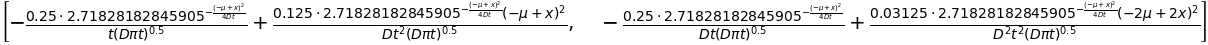

In [25]:
import sympy as sp
import math 

# Initialiserer pen visning av uttrykkene
sp.init_printing()
# Definerer variablene som inngår i uttrykkene for Biot-Savarts lov for alle geometriene
D, mu, t, x, pi = sp.symbols('D, mu, t, x, pi')

#2.1: 
e = 2.718281828459045235360

phi_mark=(1/((4*pi*D*t)**0.5))*e**((-(x-mu)**2)/(4*D*t))
phi_mark

#partiellderiverte
dd = [sp.diff(phi_mark, t), sp.diff(sp.diff(phi_mark, x), x)]
dd

## 2.1

Exercise 2.1 is solved above, by differentiating the equation once in regard to $t$ (shown as the first equation), and then twice in regards to $x$ (shown as the second equation). This results in two equations, where we can see that $\frac{\partial \phi(x,t)}{\partial t}$ is equal to $D*\frac{\partial^2 \phi(x,t)}{\partial x^2}$ when we know that $0.03125*4 = 0.125$.


## 2.2.2

Diffusion is a process where particles move, driven by the random movement of particles, from areas with high concentration to areas with lower concentrations. 

Exercise 2.2.1 results in the formula for the normal distribution:

$\phi (x,t) = \frac{1}{\sqrt{4 \pi D t}} e^{-\frac{(x-x_0)^2}{4 D t}}$

where $D$ is the diffusion coefficient. This constant will affect how the particles will distribute along the x-axis. With a higher coefficient $D$ the graph for normal distribution  will give a flatter/lower top , whereas a low value for $D$ will give a steeper (higher peak) and more concentrated (not so distributed along the x-axis) graph. 



The rest of the calculations for task 2 can be found in the files attached in blackboard. 

## Task 3

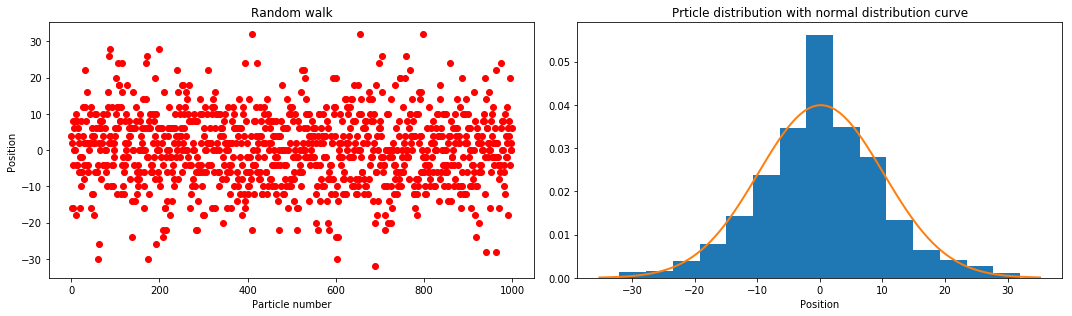

In [26]:
import numpy as np
import pylab
import random
from scipy.stats import norm
import matplotlib.pyplot as plt

# 1000 particles at x = 0
Particles = []
#Steps in space
# Set time variable
t = 0
h = 1

#Set while loop: 100 time steps where delta_t = 1
for _ in range(1000):
    t = 0
    x = 0
    while t < 100:
        t +=1
        prob = np.random.uniform(0,1)  #Random number
        #Moving +h or -h
        if prob >= 0.5:
            x = x + h
        elif prob < 0.5:
            x = x - h          
    Particles.append(x)

plt.figure(figsize=(15,4.5))
plt.subplot(1, 2, 1)
plt.plot(Particles, 'ro')
plt.title("Random walk")
plt.ylabel('Position')
plt.xlabel('Particle number')
plt.subplot(1, 2, 2)
x,y,_ = plt.hist(Particles, bins=15, density=True)
mu, std = norm.fit(Particles)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, linewidth=2)
plt.title("Prticle distribution with normal distribution curve")
plt.xlabel('Position')
plt.tight_layout()
plt.show()   


In this exercise  it was assumed that there is zero probability for the particle(s) to stay put. This means that the particle(s) moved right or left in the random walk simulation. According to the theory the particles will move randomly from areas with high concentration (in this case at $x$ = 0) to areas with lower concentration only due to the physical driving force of diffusion (random walk). From the histogram it can be seen that the majority of particles are around 0 (at $t$ = 100), and some (very few) of them are scattered in the edges of the $x$-axis. This situation changes with increasing times because by then the  particles will have spread further away from the system's origin. This means, graphically speaking, that in the histogram above the top of the  bell will gradually sink while its sides become less and less steep (they will flatten).

The idea behind the graph in the left side is to show the distribution of the particles in a more "particle" way so that the reader could have a better visualization of the situation. Besides it is another way to compare the results thrown by the code with the theory. This type of graph (with the same mentioned purposes) will be included in the next section as well.

## Task 5.1

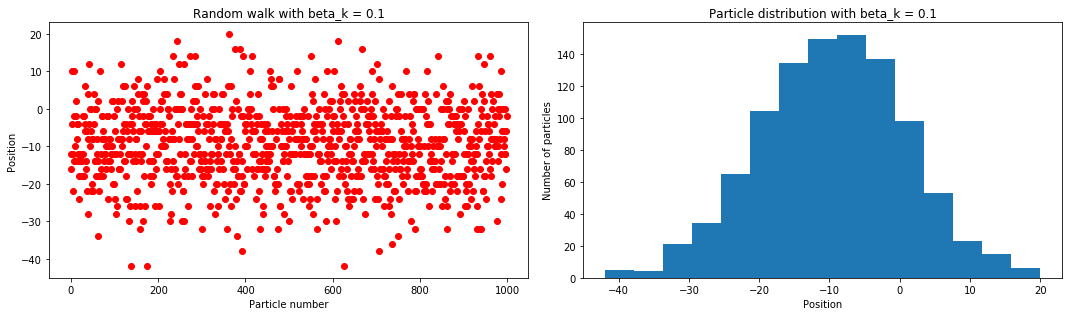

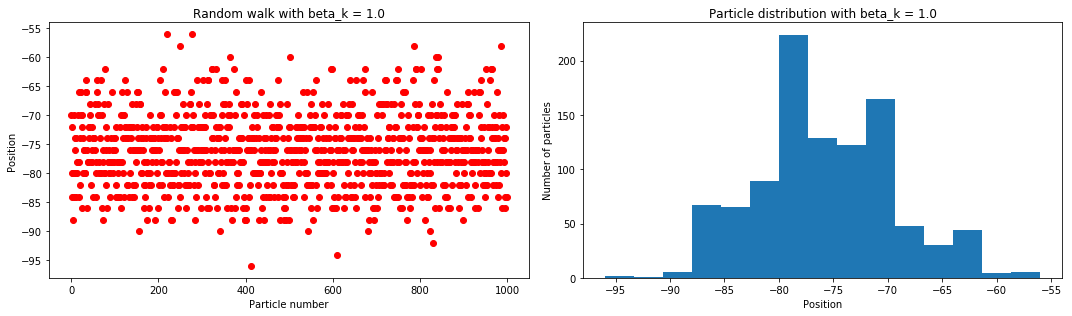

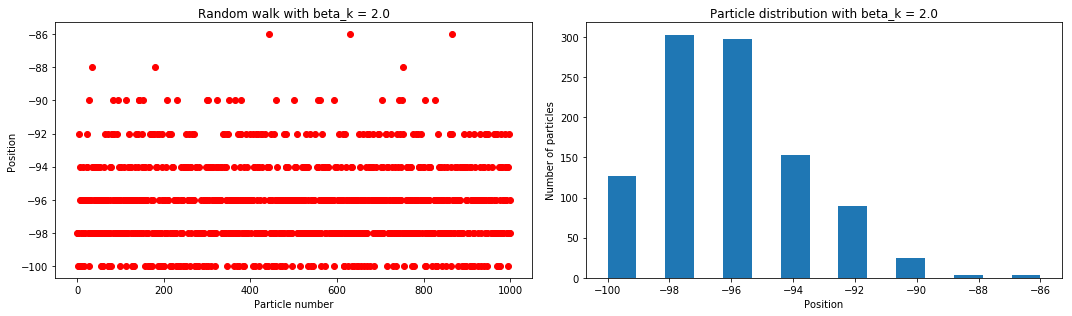

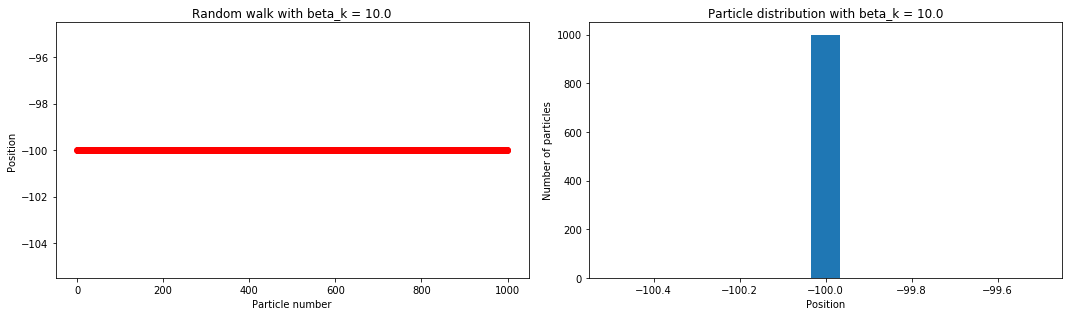

In [27]:
# 1000 particles at x = 0
Particles = []

#Steps in space
# Set time variable
t = 0
h = 1

# Fixed beta_k
bk = 0
for bk in range(4):
    bk +=1
    if bk == 1:
        beta_k = 0.1
    elif bk == 2:
        beta_k = 1
    elif bk == 3:
        beta_k = 2
    else: 
        beta_k = 10
    for _ in range(1000):
        t = 0
        x = 0
        while t < 100:
            t +=1
            #Random number
            prob = np.random.uniform(0,1)
            # Probability ratio for x = 0
            if t == 0:
                p_minus_over_p_pluss = np.exp(2*beta_k)
                p_pluss = 1 /(1 + p_minus_over_p_pluss)
                p_minus = 1 - p_pluss
            else:
                p_minus_over_p_pluss = np.exp(-1*beta_k*((x-h)-(x+h)))
                p_pluss = 1 /(1 + p_minus_over_p_pluss)
                p_minus = 1 - p_pluss
            #Moving +h or -h
            if prob >= p_minus:
                x = x + h
            elif prob < p_minus:
                x = x - h      
        Particles.append(x)
    plt.figure(figsize=(15,4.5))
    plt.subplot(1, 2, 1)
    plt.plot(Particles, 'ro')
    plt.title('Random walk with beta_k = %1.1f' %beta_k)
    plt.ylabel('Position')
    plt.xlabel('Particle number')
    plt.subplot(1, 2, 2)
    plt.hist(Particles, bins=15)
    plt.title('Particle distribution with beta_k = %1.1f' %beta_k)
    plt.xlabel('Position')
    plt.ylabel('Number of particles')
    plt.tight_layout()
    plt.show()
    Particles = []
    

In this exercise the particles are subject to a constant drift that is dependent on the position (linear). This means that the particles will no longer spread because of the diffusion itself but because the constant drift that acts upon them determines the position (random walk) they end up in.

With a $\beta  k$ (ratio between potential energy and thermal energy) of 0.1 the thermal energy is 10 times as big as the potential energy, meaning that the thermal energy predominates over the potential energy. This results in that the random walk will be, in its majority, determined by the thermal energy, and the histogram in the figure resembles the distribution of a random walk  plus a displacement due to the acting potential.

With a $\beta  k= 1$  the thermal energy is equally as likely to act upon the particles as the potential energy and therefore both can equally determine the distribution of the particles. One can see from the figure  these particles have been  displaced further to the left and that the particles distribution is less uniformly distributed (see $y$-axis). 

Finally when $\beta k= 10$ the potential energy is ten times the thermal energy which leads to all the 1000 particles having drifted to the area of least potential.


## Task 5.2

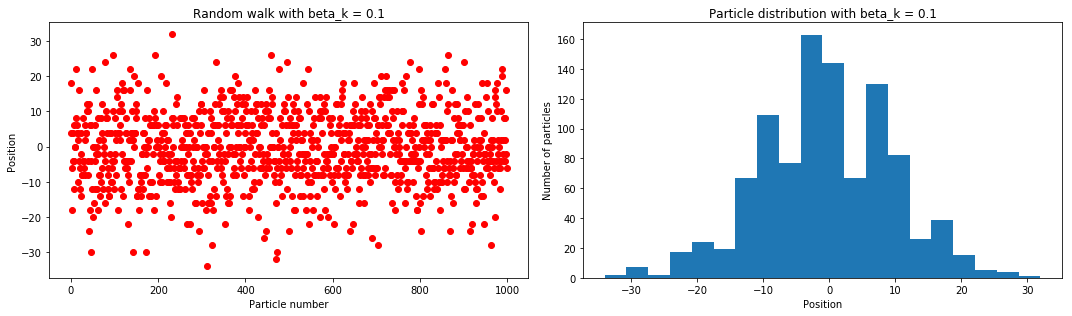

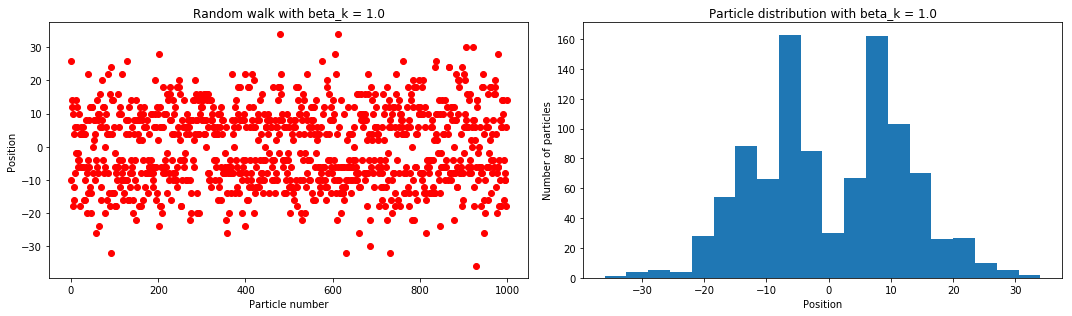

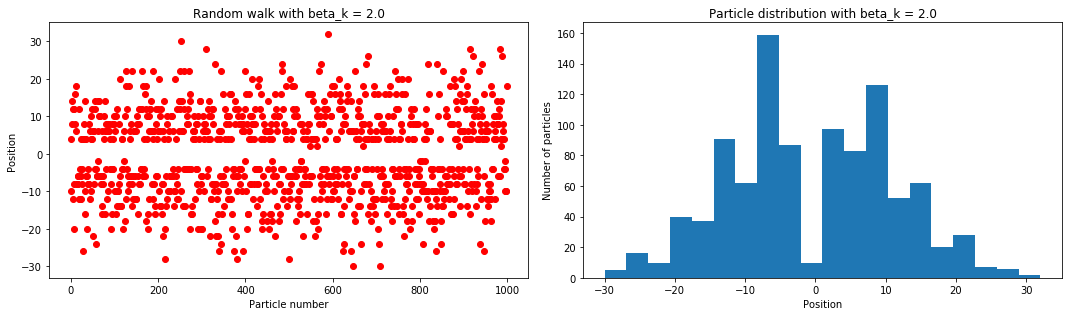

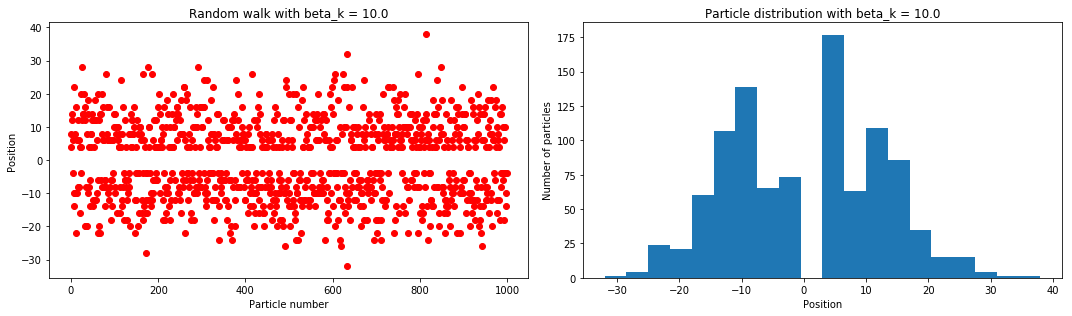

In [28]:
# 1000 particles at x = 0
Particles = []

# Set time variable
t = 0
h = 1

def V(x, beta_k, h):
    if -3*h < x < 3*h:
        return beta_k
    else:
        return 0

bk = 0
#Set while loop: 100 time steps where delta_t = 1
for bk in range(4):
    bk +=1
    if bk == 1:
        beta_k = 0.1
    elif bk == 2:
        beta_k = 1
    elif bk == 3:
        beta_k = 2
    else: 
        beta_k = 10
    for _ in range(1000):
        t = 0
        x = 0
        while t < 100:
            t +=1
            #Random number
            prob = np.random.uniform(0,1)
            # Probability ratio for x = 0
            p_minus_over_p_pluss = np.exp(-1*(V(x-h, beta_k, h)-V(x+h, beta_k, h)))
            p_pluss = 1 /(1 + p_minus_over_p_pluss)
            p_minus = 1 - p_pluss
            #Moving +h or -h
            if prob >= p_minus:
                x = x + h
            elif prob < p_minus:
                x = x - h      
        Particles.append(x)
        
    plt.figure(figsize=(15,4.5))
    plt.subplot(1, 2, 1)
    plt.plot(Particles, 'ro')
    plt.title('Random walk with beta_k = %1.1f' %beta_k)
    plt.ylabel('Position')
    plt.xlabel('Particle number')
    plt.subplot(1, 2, 2)
    plt.hist(Particles, bins=20)
    plt.title('Particle distribution with beta_k = %1.1f' %beta_k)
    plt.xlabel('Position')
    plt.ylabel('Number of particles')
    plt.tight_layout()
    plt.show()
    Particles = []
    

In this exercise there's a constant potential between $-3$ and $3$ and a potential of zero everywhere else. The same analysis for what the different $\beta k$'s mean to the  particle's displacement  apply to this exercise as well but this one has different results:

With $\beta k$ = 0.1 there's a less resemblance (uniform distribution) to that figure from exercise 5.1 (and therefore even less resemblance with the one from exercise 3)  because now there's a constant potential (in this case with a smaller effect than the thermal energy) that drifts the particles to an area of lower potential.

With $\beta k$ = 1 the importance (for the displacement of the particles) of this area with constant potential becomes clearer. Here one can see that in the area with constant potential there are fewer particles because these are being drifted away at the points where there's a difference in potential. This becomes dramatically clearer as $\beta k$ increases to 10: Inside the barrier there are no particles at all because  the action of the potential .   

## Task 5.3

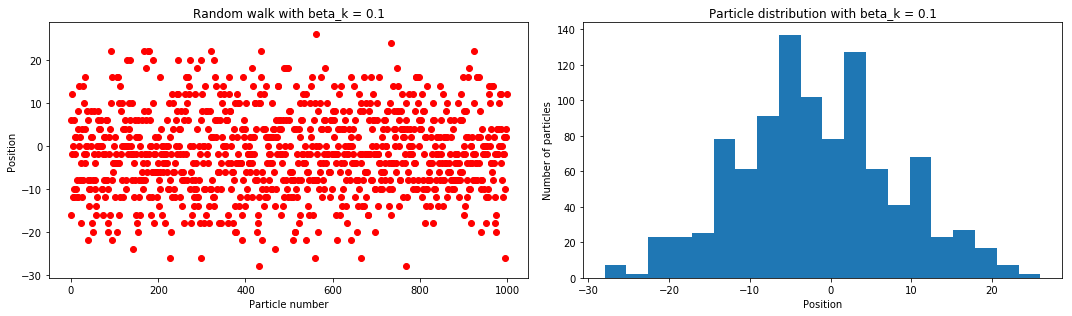

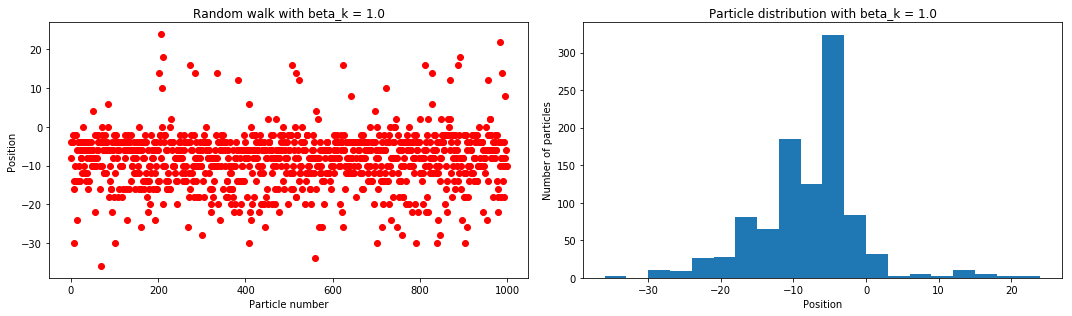

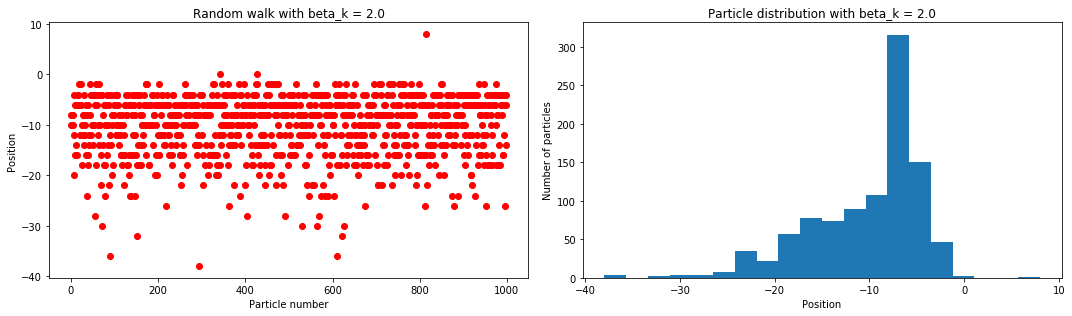

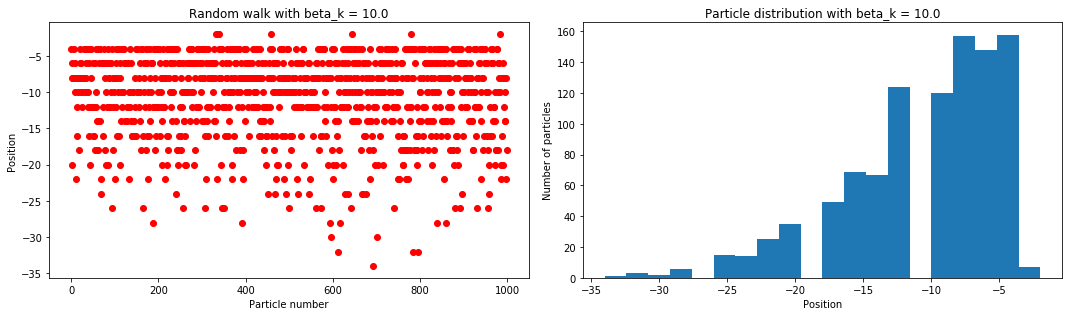

In [29]:
# 1000 particles at x = 0
Particles = []

#Steps in space
# Set time variable
t = 0
h = 1

def V(x, beta_k, h):
    if x <= -3*h:
        return -beta_k
    elif -3*h < x < 3*h:
        return beta_k*(-1 + 2*((x+3*h)/6*h))
    elif x >= 3*h:
        return beta_k

bk = 0
#Set while loop: 100 time steps where delta_t = 1
for bk in range(4):
    bk +=1
    if bk == 1:
        beta_k = 0.1
    elif bk == 2:
        beta_k = 1
    elif bk == 3:
        beta_k = 2
    else: 
        beta_k = 10
    for _ in range(1000):
        t = 0
        x = 0
        while t < 100:
            t +=1
            #Random number
            prob = np.random.uniform(0,1)
            # Probability ratio for x = 0
            p_minus_over_p_pluss = np.exp(-1*(V(x-h, beta_k, h)-V(x+h, beta_k, h)))
            p_pluss = 1 /(1 + p_minus_over_p_pluss)
            p_minus = 1 - p_pluss
            #Moving +h or -h
            if prob >= p_minus:
                x = x + h
            elif prob < p_minus:
                x = x - h      
        Particles.append(x)
    
    plt.figure(figsize=(15,4.5))
    plt.subplot(1, 2, 1)
    plt.plot(Particles, 'ro')
    plt.title('Random walk with beta_k = %1.1f' %beta_k)
    plt.ylabel('Position')
    plt.xlabel('Particle number')    
    plt.subplot(1, 2, 2)
    plt.hist(Particles, bins=20)
    plt.title('Particle distribution with beta_k = %1.1f' %beta_k)
    plt.xlabel('Position')
    plt.ylabel('Number of particles')
    plt.tight_layout()
    plt.show()
    Particles = []

In this system there's a  constant potential outside a membrane and a linear potential within the membrane. When $\beta k = 0.1$ there's a relatively normal distribution because of the small effect that the potential (three potentials in this case) has in the random walk. When this number increases the particle's distribution is displaced to the left (area with least potential) even more and when it finally is equal to 10 then the whole distribution is taken to the other side of the membrane(in the direction of decreasing x). One should notice clearly the difference of $\beta k = 10$ from the previous exercises: here, with the help of the three potentials, the whole distribution has been relocated gradually into the area of the lowest possible potential. 


## Task 7.1

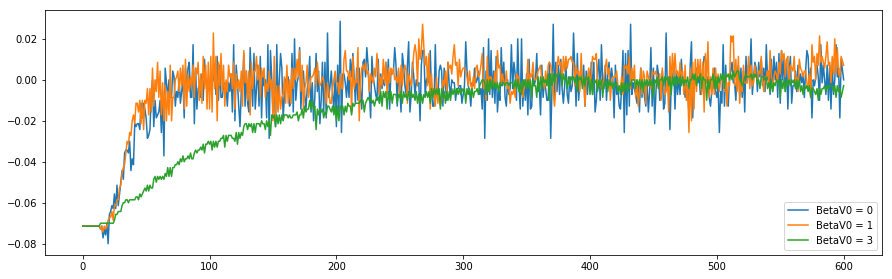

In [3]:
import numpy as np
import pylab
import math 
import random

pylab.figure(figsize=(15,4.5))


L=50

T = 310
k_B = 1.38e-23
e = 1.6e-19

Beta = 1/(T*k_B)


V_Na0 = 0/Beta
V_K0 = 0/Beta
Cc = 0.07


steps= 600

h= 1

Ut_list = np.ones(steps)

###################################
#partikkles released inside at -L/4
#list_Na= ((-L/4)*np.ones(50)).astype(np.int32)
#list_K = ((-L/4)*np.ones(1400)).astype(np.int32)

list_Na= ((-L/4)*np.ones(50))
list_K = ((-L/4)*np.ones(1400))

#numK_in_cell = 1400
#numNa_in_cell = 50



numP_out_cell = 1500

####################################
#partikkles released outside at L/4 
#list_Na_O = (L/4*np.ones(1450)).astype(np.int32)
#list_K_O = (L/4*np.ones(50)).astype(np.int32)

list_Na_O = (L/4*np.ones(1450))
list_K_O = (L/4*np.ones(50))



####################################
#relativ sannsylighete for Kalium og Natrium
def rel_P_K(x,t,U):
    return np.exp(Beta*(V_K(x+h)+V(x+h,t,U)-(V_K(x-h)+V(x-h,t,U))))
    
def rel_P_Na(x,t,U):
    return np.exp(Beta*(V_Na(x+h)+V(x+h,t,U)-(V_Na(x-h)+V(x-h,t,U))))

#################################
def V_K(x):
    if -h <= x <= h:
        return V_K0
    else:
        return 0
#################################
def V_Na(x):
    if -h <= x <= h:
        return V_Na0
    else:
        return 0
#################################

def V(x,t,U):
    if -h <= x <=h:
        return -(e*U/(2*h))*x
    elif x > h:
        return -0.5*e*U
    else:
        return 0.5*e*U

    
#################################
def iterator():
    
    # med ".astype(np.int32)" så oscillerer grafen veldig mye

            #partikkles released outside at L/4
    #list_Na_O = (L/4*np.ones(1450)).astype(np.int32)
    #list_K_O = (L/4*np.ones(50)).astype(np.int32)
            #partikkles released inside at -L/4
    #list_Na= ((-L/4)*np.ones(50)).astype(np.int32)
    #list_K = ((-L/4)*np.ones(1400)).astype(np.int32)

            #partikkles released outside at L/4
    list_Na_O = (L/4*np.ones(1450))
    list_K_O = (L/4*np.ones(50))
    
            #partikkles released inside at -L/4
    list_Na= ((-L/4)*np.ones(50))
    list_K = ((-L/4)*np.ones(1400))

    
    for t in range(steps):
        
        numK_in_cell = 0
        numNa_in_cell = 0

        for i in range(list_Na.size):
            if list_Na[i] < -h:
                numNa_in_cell += 1
        for i in range(list_Na_O.size):
            if list_Na_O[i] < -h:
                numNa_in_cell += 1
        for i in range(list_K.size):
            if list_K[i] < -h:
                numK_in_cell += 1
        for i in range(list_K_O.size):
            if list_K_O[i] < -h:
                numK_in_cell += 1

        ########Utregning av Spenning.
        numP_in_cell = numK_in_cell + numNa_in_cell
        Ion_cons = (numP_in_cell - numP_out_cell)*0.1e-3
        U = Ion_cons/Cc
        
        Ut_list[t] = U
  

    #########################################
        ########RandomWalk for Kalium som starter inne

        for i in range(np.size(list_K)):
            prob = np.random.uniform(0,1)
            PP = rel_P_K(list_K[i],t,U)
            den = 1 + PP
            p_pluss = 1/den
            p_minus = 1-p_pluss

            if prob>=p_minus:
                if list_K[i]>=L/2:
                    list_K[i]=list_K[i]-h
                else:
                    list_K[i]=list_K[i]+h

            if prob < p_minus:
                if list_K[i] <= -L/2:
                    list_K[i]=list_K[i]+h
                else:
                    list_K[i]=list_K[i]-h
                   
    ##############################################
    ########Randomwalk for Kallium som starter Ute               
        for i in range(np.size(list_K_O)):
            prob = np.random.uniform(0,1)
            PP = rel_P_K(list_K_O[i],t,U)
            den = 1 + PP
            p_pluss = 1/den
            p_minus = 1-p_pluss

            if prob>=p_minus:
                
                if list_K_O[i]>=L/2:
                    list_K_O[i]=list_K_O[i]-h
                else:
                    list_K_O[i]=list_K_O[i]+h
            
            if prob < p_minus:
            
                if list_K_O[i] <= -L/2:
                    list_K_O[i]=list_K_O[i]+h
                else:
                    list_K_O[i]=list_K_O[i]-h
                    

    ############################################
    ###############Randomwalk for Natrium som starter inne  
            
        for i in range(np.size(list_Na)):
            prob = np.random.uniform(0,1)
            PP = rel_P_Na(list_Na[i],t,U)
            den = 1 + PP
            p_pluss = 1/den
            p_minus = 1-p_pluss

            if prob>=p_minus:                
                if list_Na[i]>=L/2:
                    list_Na[i]=list_Na[i]-h
                else:
                    list_Na[i]=list_Na[i]+h
                    
            if prob < p_minus:              
                if list_Na[i] <= -L/2:
                    list_Na[i]=list_Na[i]+h
                else:
                    list_Na[i]=list_Na[i]-h


    ############################################
    ###############Randomwalk for Natrium som starter ute
        for i in range(np.size(list_Na_O)):
            prob = np.random.uniform(0,1)
            PP = rel_P_Na(list_Na_O[i],t,U)
            den = 1 + PP
            p_pluss = 1/den
            p_minus = 1-p_pluss

            if prob>=p_minus:
                if list_Na_O[i]>=L/2:
                    list_Na_O[i]=list_Na_O[i]-h
                else:
                    list_Na_O[i]=list_Na_O[i]+h
            if prob < p_minus:
                
                if list_Na_O[i] <= -L/2:
                    list_Na_O[i]=list_Na_O[i]+h
                else:
                    list_Na_O[i]=list_Na_O[i]-h


########################################
#Oppgave 7.1
                    
x=np.linspace(0,steps,steps,dtype=int)


V_Na0 = 0/Beta
V_K0 = 0/Beta
iterator()
pylab.plot(x,Ut_list,label='BetaV0 = 0')
pylab.legend(loc='lower right')
##########################################


V_Na0 = 1/Beta
V_K0 = 1/Beta
iterator()
pylab.plot(x,Ut_list,label='BetaV0 = 1')
pylab.legend(loc='lower right')
#######################################
########################################


V_Na0 = 3/Beta
V_K0 = 3/Beta
iterator()
pylab.plot(x,Ut_list,label='BetaV0 = 3')
pylab.legend(loc='lower right')
pylab.show()

As we can observe from the figure, the three plotted functions, which are the potentials across the cell wall for three chosen values of $\beta V^0$ as a function of time, where $V^0$ is the membrane potential, settles around a voltage equal to zero and oscillate around it. The oscillations occurs because there is always a probability that particles move a little more in one direction and they get inside the cell so the voltage across the cell wall changes and the voltage again drives the particles in the direction of less potential energy.

The voltage across the cell wall at the start is around $-70mV$, which is the resting potential across the cell wall. This potential changes over time because the potential energy inside the cell is less than outside, so the particles are driven inside the cell wall.
At the start we have 50 less particles inside the cell than outside, and since particles are driven more to inside the cell, the difference between the concentration of ions inside and outside the cell decreases. This leads to a decrease in the potential difference as well, so as times goes the potential settles around zero. This turns to be as expected if one sees the whole system as a capacitor where the plates ( at different potentials) can be seen as the intracellular and extracellular solutions separated by a non-conducting membrane. The potential, after some time, will be almost equal at both sides: it only fluctuates around zero because there's still a change of ion concentration inside the cell and thus a fluctuation of the values for $ V(t) $.

We can observe from the figure that for the three different values of $\beta V^0$ the rate at which the potential changes are different. It takes more time to settle for $\beta V^0=3$, where we can see that the potential reaches zero after around 400 time steps, compared to $\beta V^0 = 0 $ and $\beta V^0= 1$ where it takes around 80 time steps to reach zero. 

The reason that it takes more time for $\beta V^0=3$ is that the membrane potential for both potassium and sodium are high so it will to some extent block both the potassium and sodium from getting inside the membrane Since the ion concentration is different inside and outside, the particles are still able to move into the membrane because of diffusion, but at a lower rate.



## Task 7.2

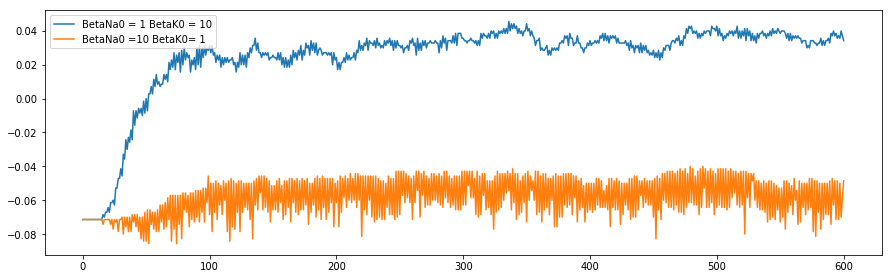

In [2]:
pylab.figure(figsize=(15,4.5))


BetaNa0=1
BetaK0 = 10

V_Na0 = BetaNa0/Beta
V_K0 = BetaK0/Beta
iterator()
pylab.plot(x,Ut_list,label='BetaNa0 = '+str(BetaNa0)+' '+'BetaK0 = '+str(BetaK0))
pylab.legend(loc='upper left')

print()

BetaNa0=10
BetaK0 = 1

V_Na0 = BetaNa0/Beta
V_K0 = BetaK0/Beta
iterator()
pylab.plot(x,Ut_list,label='BetaNa0 =' +str(BetaNa0)+' '+'BetaK0= '+str(BetaK0))
pylab.legend(loc='upper left')

pylab.show()

In the figure we have plotted potential as a function of time for these two cases:
$\beta V^0_N=1$ and  $\beta V_K^0=10$ against $\beta V^0_N=10$ and $\beta V_K^0=1$.

For $\beta V^0_N=10$ and $\beta V_K^0=1$, we see from the figure that the potential settles around zero after around 300 time steps, behaving like when we had the membrane potential for both potassium and sodium being the same and $\beta V^0 = 3$.

For $\beta V^0_N=1$ and  $\beta V_K^0=10$, nothing happens and the potential is equal to the resting potentials which is around $-70mV$.

 
When the membrane potential for sodium is high and potassium membrane potential is low, we see from the figure that the potential across the cell wall settles around -55 $mV$. This is because there are 50 potassium ions that can easily get into the cell and increase the ion concentration inside the cell. This increase is not much because there are not many potassium ions outside the cell.


As for a high membrane potential for potassium and low membrane potential for sodium, the much lower potassium quantity will be blocked and the larger sodium quantity is free to move inside the cell. This will significantly increase the ion concentration inside the cell so the potential across the cell wall will settle somewhere around 30 $mV$ as we see from the figure above .    